In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
pip install lmfit

#Data Kiwis **Malloa**



In [3]:
Archivo="/content/Información Climática Malloa - Estación climática El Tambo.xlsx"
dfAno1 = pd.read_excel(Archivo, sheet_name="2019-2020")
dfAno2 = pd.read_excel(Archivo, sheet_name="2020-2021")
dfAno3 = pd.read_excel(Archivo, sheet_name="2021-2022")
dfAno4 = pd.read_excel(Archivo, sheet_name="2022-2023")
dfAno5 = pd.read_excel(Archivo, sheet_name="2023-2024")

In [4]:
dfKiwis = pd.concat([dfAno1,dfAno2,dfAno3,dfAno4, dfAno5])
dfKiwis.reset_index(inplace=True)
#dfKiwis.to_excel("Data_Kiwis_SanFernando.xlsx", index=False)

In [5]:
dfKiwis.head()

,index,Fecha Hora,Temp. promedio aire,Precipitación horaria,Humed. rel. promedio,Presión atmosférica,Radiación solar máx.,Veloc. máx. viento,Temp. Mínima,Temp. Máxima,Dirección del viento,Grados día (base 10),Horas frío (base 7)
0,0,2019-05-01 00:00:00,8.5,0,60.9,991.2,0,0.5,6.8,9.9,119.1,--,--
1,1,2019-05-01 01:00:00,5.9,0,70.3,991,0,0.7,5.7,6.5,90.9,--,--
2,2,2019-05-01 02:00:00,7.3,0,71.8,991,0,0.9,6.6,8.1,148.3,--,--
3,3,2019-05-01 03:00:00,6.9,0,72,991,0,1.4,6.4,8.1,66.3,--,--
4,4,2019-05-01 04:00:00,8.8,0,65.2,990.2,0,2.3,8.4,9.1,81.3,--,--


#Datos faltantes

In [6]:
dfrespaldo=dfAno1.copy()
dfrespaldo.replace('--', np.nan, inplace=True)

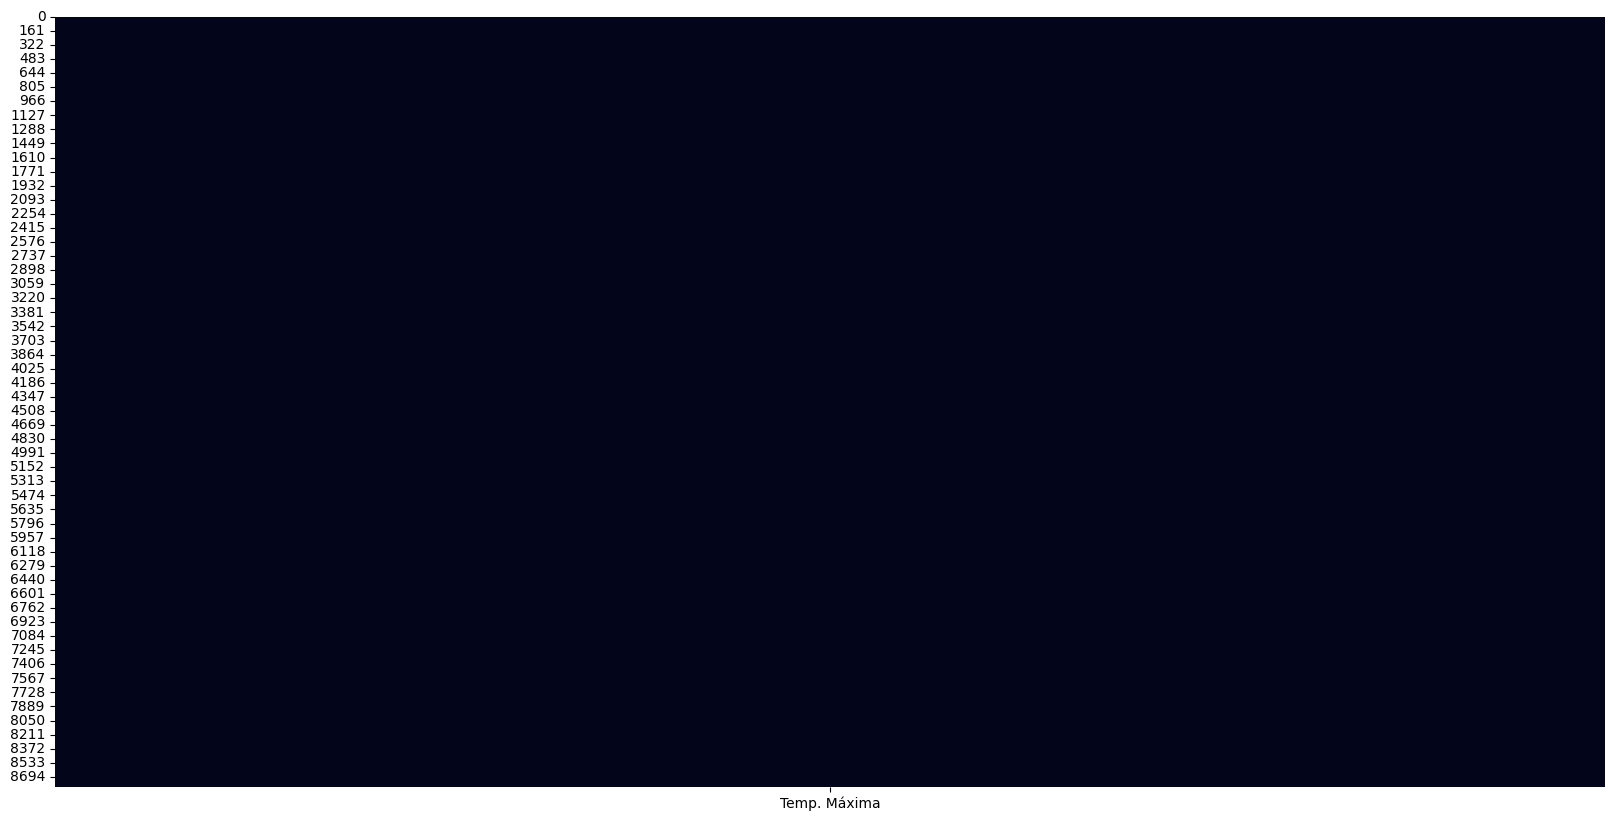

In [7]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(dfrespaldo[['Temp. Máxima']].isnull(), cbar=False)
plt.show()

In [8]:
dfrespaldo=dfAno2.copy()
dfrespaldo.replace('--', np.nan, inplace=True)

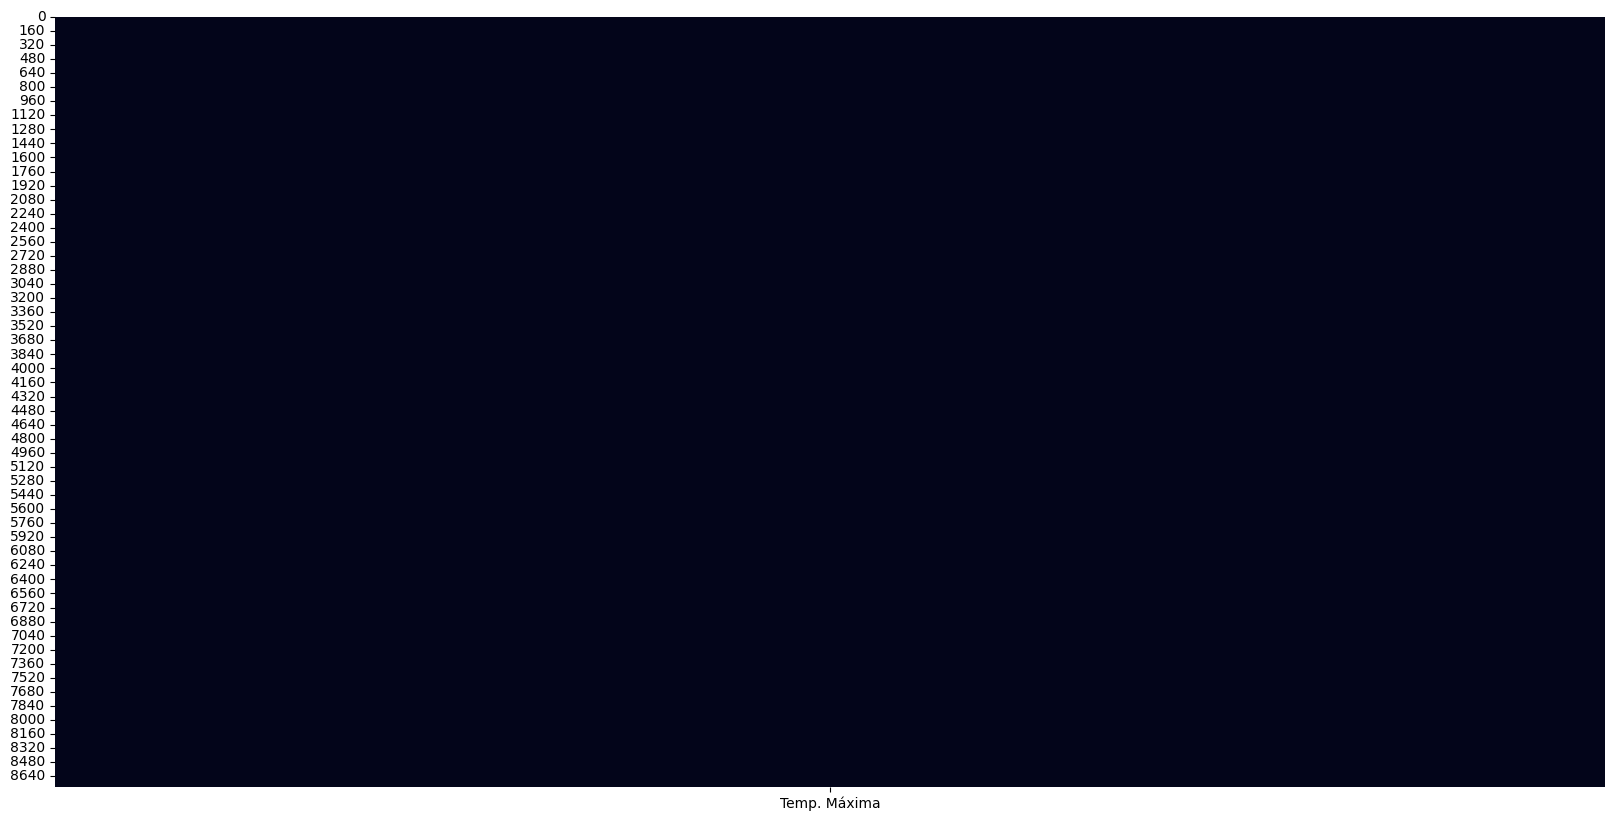

In [9]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(dfrespaldo[['Temp. Máxima']].isnull(), cbar=False)
plt.show()

In [10]:
dfrespaldo=dfAno3.copy()
dfrespaldo.replace('--', np.nan, inplace=True)

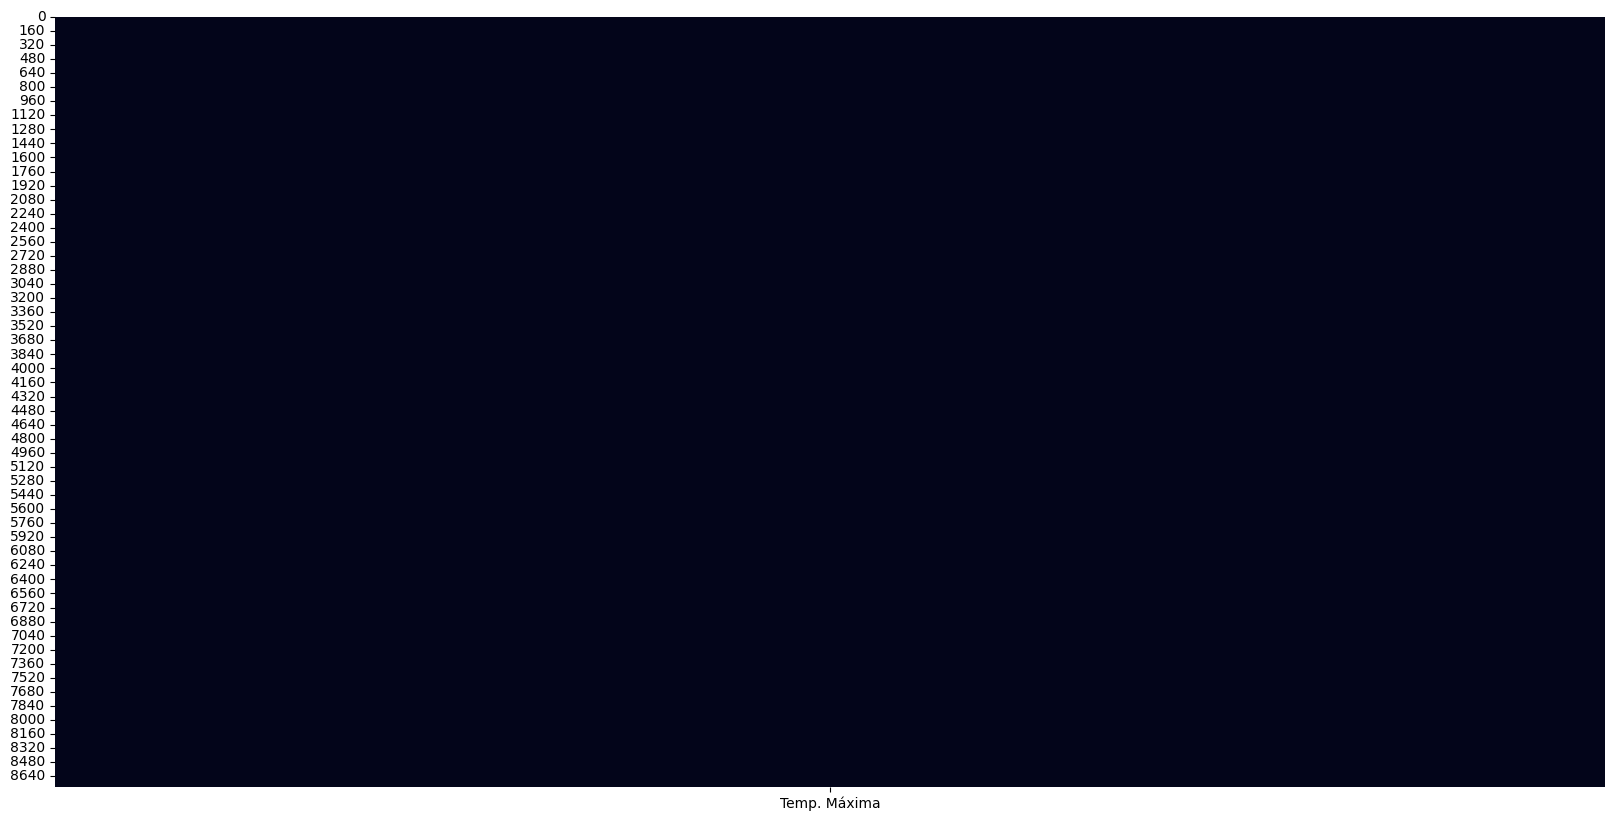

In [11]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(dfrespaldo[['Temp. Máxima']].isnull(), cbar=False)
plt.show()

In [12]:
dfrespaldo=dfAno4.copy()
dfrespaldo.replace('--', np.nan, inplace=True)

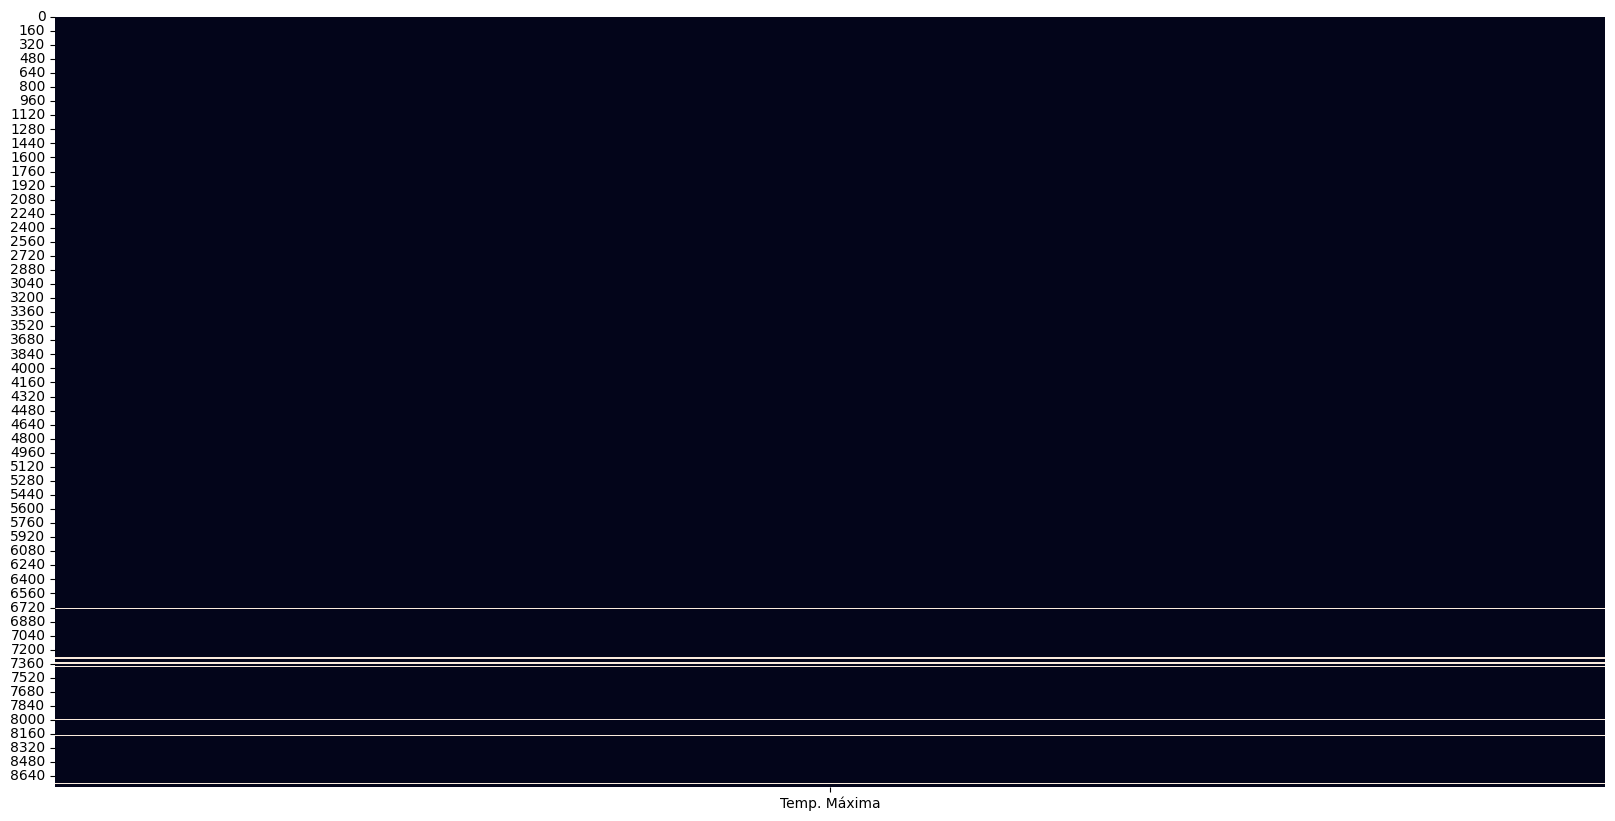

In [13]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(dfrespaldo[['Temp. Máxima']].isnull(), cbar=False)
plt.show()

In [14]:
dfrespaldo=dfAno5.copy()
dfrespaldo.replace('--', np.nan, inplace=True)

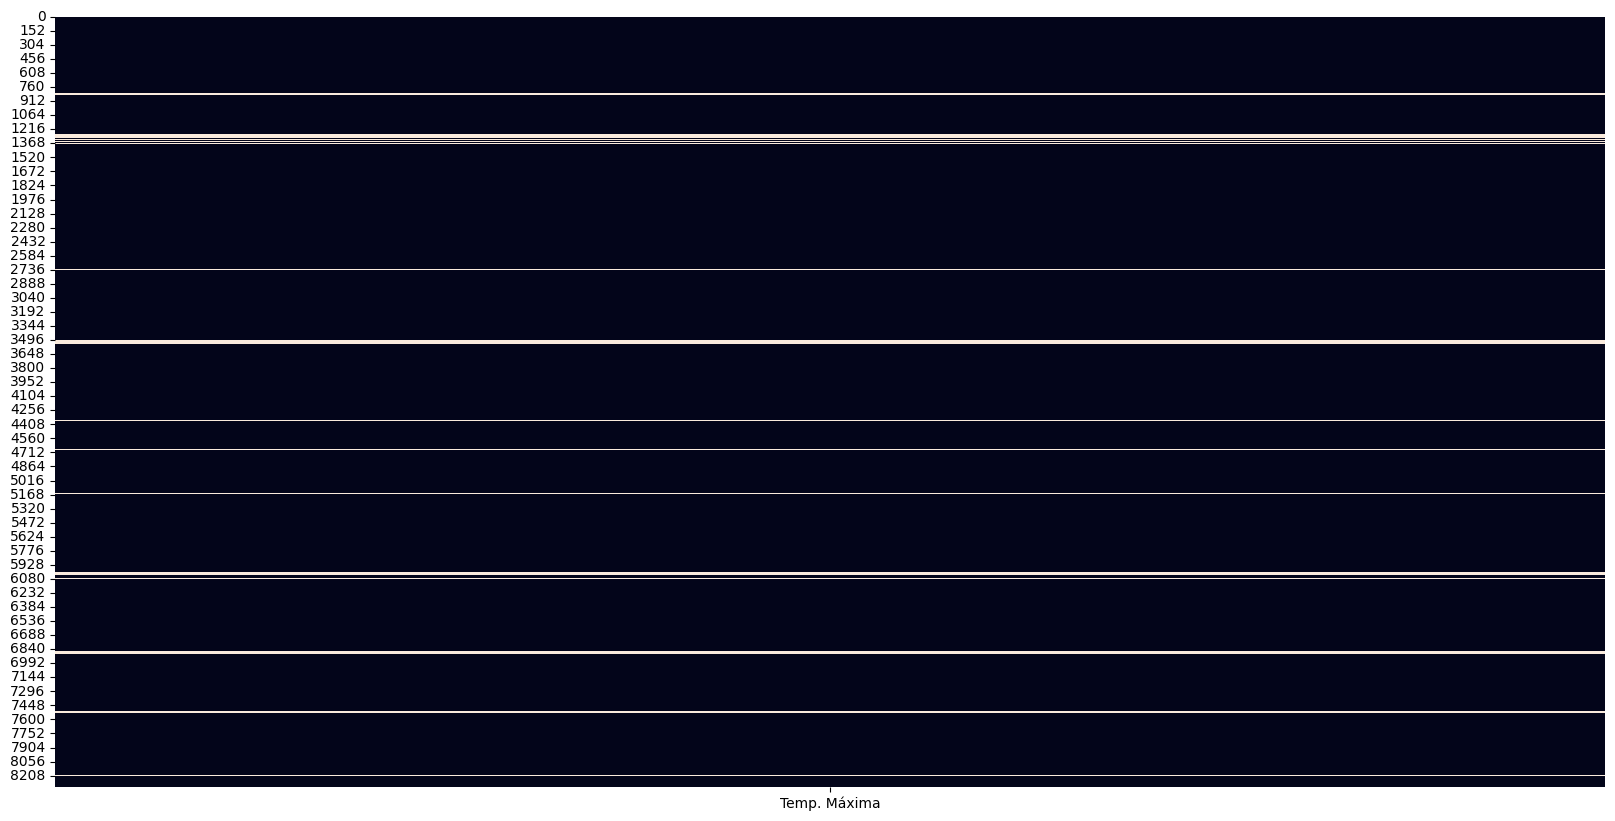

In [15]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(dfrespaldo[['Temp. Máxima']].isnull(), cbar=False)
plt.show()

#Implementacion

## Método sinusoidal (Paper)



In [24]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = datetime.date(2019, 5, 1)
fecha_final = datetime.date(2024, 4, 12)

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas)

Lista de fechas julianas entre 2019-05-01 y 2024-04-12 :
[2458605, 2458606, 2458607, 2458608, 2458609, 2458610, 2458611, 2458612, 2458613, 2458614, 2458615, 2458616, 2458617, 2458618, 2458619, 2458620, 2458621, 2458622, 2458623, 2458624, 2458625, 2458626, 2458627, 2458628, 2458629, 2458630, 2458631, 2458632, 2458633, 2458634, 2458635, 2458636, 2458637, 2458638, 2458639, 2458640, 2458641, 2458642, 2458643, 2458644, 2458645, 2458646, 2458647, 2458648, 2458649, 2458650, 2458651, 2458652, 2458653, 2458654, 2458655, 2458656, 2458657, 2458658, 2458659, 2458660, 2458661, 2458662, 2458663, 2458664, 2458665, 2458666, 2458667, 2458668, 2458669, 2458670, 2458671, 2458672, 2458673, 2458674, 2458675, 2458676, 2458677, 2458678, 2458679, 2458680, 2458681, 2458682, 2458683, 2458684, 2458685, 2458686, 2458687, 2458688, 2458689, 2458690, 2458691, 2458692, 2458693, 2458694, 2458695, 2458696, 2458697, 2458698, 2458699, 2458700, 2458701, 2458702, 2458703, 2458704, 2458705, 2458706, 2458707, 2458708, 245870

In [25]:
Temperaturas_maximas_diarias=[]
max=0
for i in range(0,len(dfKiwis)-1):
  if i%24!=0:
    if dfKiwis["Temp. Máxima"][i]=="--":
      dfKiwis["Temp. Máxima"][i]=0
    if max<float(dfKiwis["Temp. Máxima"][i]):
      max=float(dfKiwis["Temp. Máxima"][i])
  else:
    Temperaturas_maximas_diarias.append(max)
    max=0

In [26]:
T= Temperaturas_maximas_diarias
n=len(lista_fechas_julianas)-1

In [27]:
len(J)

1809

In [28]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[-1]+0.5*(secuenciaS[-1]+secuenciaS[-2])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG


175.12483077714313
197.12829199513178 5.898158734566547e-05 4.282973593274489 175.12483077714313


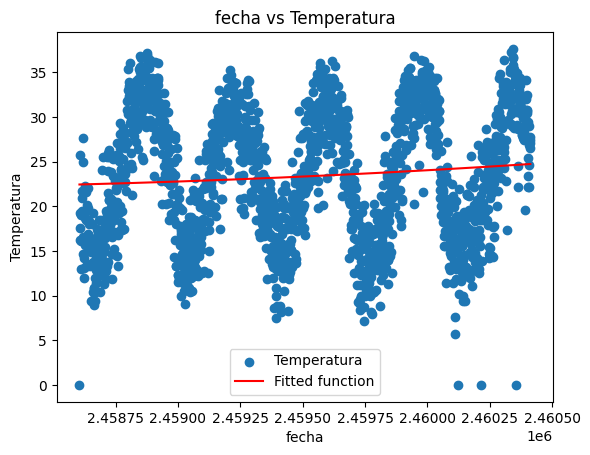

R^2  0.008463177502361474


In [29]:
J=lista_fechas_julianas
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n-1):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  a_44=n
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print(rho_3)


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print(a_3, omega_3,phi_3, rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*np.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

##Otro modelo

8.649814456669345 0.0027117432432390742 807.0895203606705 22.955693255420496
R^2: 0.7223012601581301


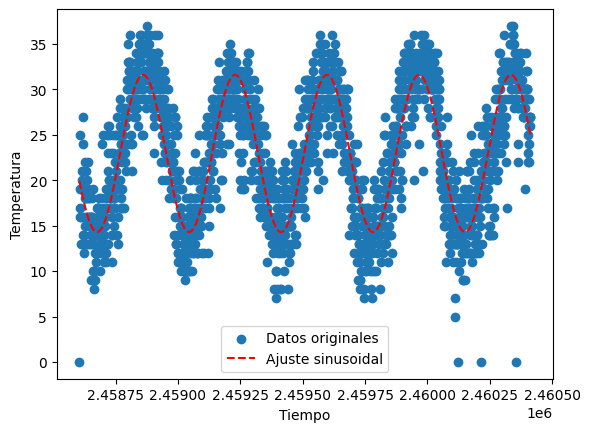

el valor de a_3 es  22.955693255420496
el valor de omega_3 es  0.0027117432432390742
el valor de rho_3 es  8.649814456669345
el valor de phi_3 es  807.0895203606705


In [30]:

t_data=np.array(lista_fechas_julianas).astype(int)
y_data=np.array(Temperaturas_maximas_diarias).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

ListaFFTa_3=[]
ListaFFTrho_3=[]
ListaFFTomega_3=[]
ListaFFTphi_3=[]
print("el valor de a_3 es ", D_ajustado)
ListaFFTa_3.append(D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
ListaFFTomega_3.append(f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
ListaFFTrho_3.append(A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)
ListaFFTphi_3.append(φ_ajustada)


# Año 1 (2019-2020)

##Temp Maxima


In [31]:
dfKiwisModelo=dfAno1.copy()

In [32]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = dfKiwisModelo["Fecha Hora"][0]
fecha_final = dfKiwisModelo["Fecha Hora"][len(dfKiwisModelo)-61*24]

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas_ano1 = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas_ano1)

Lista de fechas julianas entre 2019-05-01 00:00:00 y 2020-03-02 00:00:00 :
[2458605, 2458606, 2458607, 2458608, 2458609, 2458610, 2458611, 2458612, 2458613, 2458614, 2458615, 2458616, 2458617, 2458618, 2458619, 2458620, 2458621, 2458622, 2458623, 2458624, 2458625, 2458626, 2458627, 2458628, 2458629, 2458630, 2458631, 2458632, 2458633, 2458634, 2458635, 2458636, 2458637, 2458638, 2458639, 2458640, 2458641, 2458642, 2458643, 2458644, 2458645, 2458646, 2458647, 2458648, 2458649, 2458650, 2458651, 2458652, 2458653, 2458654, 2458655, 2458656, 2458657, 2458658, 2458659, 2458660, 2458661, 2458662, 2458663, 2458664, 2458665, 2458666, 2458667, 2458668, 2458669, 2458670, 2458671, 2458672, 2458673, 2458674, 2458675, 2458676, 2458677, 2458678, 2458679, 2458680, 2458681, 2458682, 2458683, 2458684, 2458685, 2458686, 2458687, 2458688, 2458689, 2458690, 2458691, 2458692, 2458693, 2458694, 2458695, 2458696, 2458697, 2458698, 2458699, 2458700, 2458701, 2458702, 2458703, 2458704, 2458705, 2458706, 245870

In [33]:
Temperaturas_maximas_diarias_ano1=[]
max=9
for i in range(0,len(dfKiwisModelo)-60*24):
  if i%24!=0:
    if dfKiwisModelo["Temp. Máxima"][i]=="--":
      dfKiwisModelo["Temp. Máxima"][i]=0
    if max<float(dfKiwis["Temp. Máxima"][i]):
      max=float(dfKiwisModelo["Temp. Máxima"][i])
  else:
    Temperaturas_maximas_diarias_ano1.append(max)
    max=0

<ipython-input-33-a0fd2dd91a54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo["Temp. Máxima"][i]=0
<ipython-input-33-a0fd2dd91a54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo["Temp. Máxima"][i]=0


In [34]:
len(Temperaturas_maximas_diarias_ano1)

307

In [35]:
len(lista_fechas_julianas)

1809

Coeficiente A de la sinusoidal: 3188.458966261637
Coeficiente D de la sinusoidal: 3201.1891497738557 Coeficiente B de la sinusoidal: 0.0002946315811933557 Coeficiente C de la sinusoidal: 2.9287479419718463 Coeficiente A de la sinusoidal: 3188.458966261637


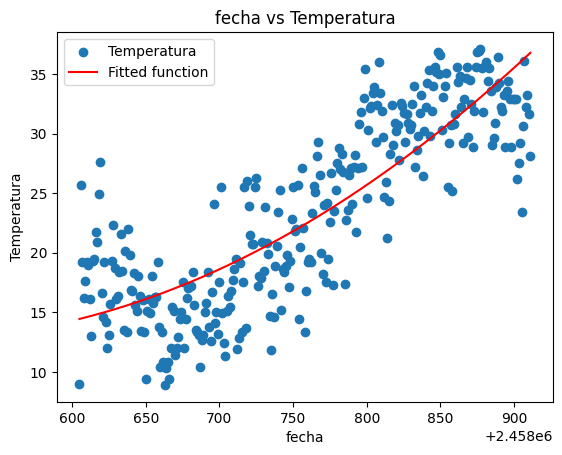

R^2  0.7067956428922197


In [36]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[i-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[i-1]+0.5*(secuenciaS[i]+secuenciaS[i-1])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG

T= Temperaturas_maximas_diarias_ano1
n=len(lista_fechas_julianas_ano1)
J=lista_fechas_julianas_ano1
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
a_44=n
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print("Coeficiente A de la sinusoidal:", rho_3 )


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print("Coeficiente D de la sinusoidal:",a_3, "Coeficiente B de la sinusoidal:", omega_3,"Coeficiente C de la sinusoidal:", phi_3,"Coeficiente A de la sinusoidal:", rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*math.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

In [37]:
print("Coeficientes finales: a", a_3, "Rho", rho_3, "Omega:", omega_3, "Phi:", phi_3)
ListaA=[]
ListaA.append(a_3)
ListaRho=[]
ListaRho.append(rho_3)
ListaOmega=[]
ListaOmega.append(omega_3)
ListaPhi=[]
ListaPhi.append(phi_3)

Coeficientes finales: a 3201.1891497738557 Rho 3188.458966261637 Omega: 0.0002946315811933557 Phi: 2.9287479419718463


## Modelo FFT

9.04064891907152 0.002568131665811136 10647.20646290311 23.44072240463434
R^2: 0.7996211003072343


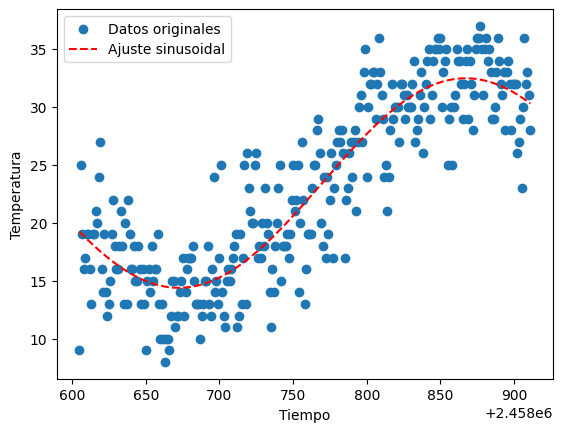

el valor de a_3 es  23.44072240463434
el valor de omega_3 es  0.002568131665811136
el valor de rho_3 es  9.04064891907152
el valor de phi_3 es  10647.20646290311


In [38]:

t_data=np.array(lista_fechas_julianas_ano1).astype(int)
y_data=np.array(Temperaturas_maximas_diarias_ano1).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

print("el valor de a_3 es ", D_ajustado)
ListaFFTa_3.append(D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
ListaFFTomega_3.append(f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
ListaFFTrho_3.append(A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)
ListaFFTphi_3.append(φ_ajustada)

##Temp Promedio


In [39]:
dfKiwisModelo=dfAno1.copy()

In [40]:
dfKiwisModelo.columns

Index(['Fecha Hora', 'Temp. promedio aire', 'Precipitación horaria',
       'Humed. rel. promedio', 'Presión atmosférica', 'Radiación solar máx.',
       'Veloc. máx. viento', 'Temp. Mínima', 'Temp. Máxima',
       'Dirección del viento', 'Grados día (base 10)', 'Horas frío (base 7)'],
      dtype='object')

In [41]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = dfKiwisModelo["Fecha Hora"][29*24]
fecha_final = dfKiwisModelo["Fecha Hora"][len(dfKiwisModelo)-1]

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas)

Lista de fechas julianas entre 2019-05-30 00:00:00 y 2020-04-30 23:00:00 :
[2458634, 2458635, 2458636, 2458637, 2458638, 2458639, 2458640, 2458641, 2458642, 2458643, 2458644, 2458645, 2458646, 2458647, 2458648, 2458649, 2458650, 2458651, 2458652, 2458653, 2458654, 2458655, 2458656, 2458657, 2458658, 2458659, 2458660, 2458661, 2458662, 2458663, 2458664, 2458665, 2458666, 2458667, 2458668, 2458669, 2458670, 2458671, 2458672, 2458673, 2458674, 2458675, 2458676, 2458677, 2458678, 2458679, 2458680, 2458681, 2458682, 2458683, 2458684, 2458685, 2458686, 2458687, 2458688, 2458689, 2458690, 2458691, 2458692, 2458693, 2458694, 2458695, 2458696, 2458697, 2458698, 2458699, 2458700, 2458701, 2458702, 2458703, 2458704, 2458705, 2458706, 2458707, 2458708, 2458709, 2458710, 2458711, 2458712, 2458713, 2458714, 2458715, 2458716, 2458717, 2458718, 2458719, 2458720, 2458721, 2458722, 2458723, 2458724, 2458725, 2458726, 2458727, 2458728, 2458729, 2458730, 2458731, 2458732, 2458733, 2458734, 2458735, 245873

In [42]:
Temperaturas_promedio_diarias=[]
prom=9
for i in range(29*24,len(dfKiwisModelo)):
  if i%24!=0:
    if dfKiwisModelo['Temp. Mínima'][i]=="--":
      dfKiwisModelo['Temp. Mínima'][i]=0
    prom+=float(dfKiwis['Temp. Mínima'][i])
  else:
    Temperaturas_promedio_diarias.append(prom/24)
    prom=9

<ipython-input-42-bda8ebec8b3c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo['Temp. Mínima'][i]=0


ValueError: could not convert string to float: '--'

In [ ]:
len(Temperaturas_promedio_diarias)

In [ ]:
len(lista_fechas_julianas)

In [ ]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[i-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[i-1]+0.5*(secuenciaS[i]+secuenciaS[i-1])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG

T= Temperaturas_promedio_diarias
n=len(lista_fechas_julianas)
J=lista_fechas_julianas
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
a_44=n
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print("Coeficiente A de la sinusoidal:", rho_3 )


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print("Coeficiente D de la sinusoidal:",a_3, "Coeficiente B de la sinusoidal:", omega_3,"Coeficiente C de la sinusoidal:", phi_3,"Coeficiente A de la sinusoidal:", rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*math.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

In [ ]:

t_data=np.array(lista_fechas_julianas).astype(int)
y_data=np.array(Temperaturas_promedio_diarias).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

print("el valor de a_3 es ", D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)

##Eliminando Datos

In [ ]:
dfKiwisModelo=dfAno1.copy()

In [ ]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = dfKiwisModelo["Fecha Hora"][0]
fecha_final = dfKiwisModelo["Fecha Hora"][len(dfKiwisModelo)-91*24]

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas)

In [ ]:
Temperaturas_maximas_diarias=[]
max=0
for i in range(0,len(dfKiwisModelo)-90*24):
  if i%24!=0:
    if dfKiwisModelo["Temp. Máxima"][i]=="--":
      dfKiwisModelo["Temp. Máxima"][i]=0
    if max<float(dfKiwis["Temp. Máxima"][i]):
      max=float(dfKiwisModelo["Temp. Máxima"][i])
  else:
    Temperaturas_maximas_diarias.append(max)
    max=0

### Eliminar datos aleatoriamente

In [ ]:
import random


porcentaje_eliminar = 20

num_temperaturas_eliminar = int(len(Temperaturas_maximas_diarias) * (porcentaje_eliminar / 100))

temperaturas_a_eliminar = random.sample(Temperaturas_maximas_diarias, num_temperaturas_eliminar)

indices_a_eliminar = [Temperaturas_maximas_diarias.index(temp) for temp in temperaturas_a_eliminar]
indices_a_eliminar.sort(reverse=True)

for i in indices_a_eliminar:
  Temperaturas_maximas_diarias.pop(i)

for i in indices_a_eliminar:
  lista_fechas_julianas.pop(i)

In [ ]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[-1]+0.5*(secuenciaS[-1]+secuenciaS[-2])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG

T= Temperaturas_maximas_diarias
n=len(lista_fechas_julianas)-1
J=lista_fechas_julianas
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n-1):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  a_44=n
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print("Coeficiente A de la sinusoidal:", rho_3 )


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print("Coeficiente D de la sinusoidal:",a_3, "Coeficiente B de la sinusoidal:", omega_3,"Coeficiente C de la sinusoidal:", phi_3,"Coeficiente A de la sinusoidal:", rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*math.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

In [ ]:

t_data=np.array(lista_fechas_julianas).astype(int)
y_data=np.array(Temperaturas_maximas_diarias).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

print("el valor de a_3 es ", D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)

###Eliminar secciones de la data

In [ ]:
import random


porcentaje_eliminar = 10
num_dias_eliminar = int(len(Temperaturas_maximas_diarias) * (porcentaje_eliminar / 100))
max_indice_inicio=len(Temperaturas_maximas_diarias)-num_dias_eliminar
indice_inicio = random.randint(0, max_indice_inicio)

indice_final = indice_inicio + num_dias_eliminar

Temperaturas_maximas_diarias = Temperaturas_maximas_diarias[:indice_inicio] + Temperaturas_maximas_diarias[indice_final:]
lista_fechas_julianas = lista_fechas_julianas[:indice_inicio] + lista_fechas_julianas[indice_final:]

In [ ]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[-1]+0.5*(secuenciaS[-1]+secuenciaS[-2])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG

T= Temperaturas_maximas_diarias
n=len(lista_fechas_julianas)-1
J=lista_fechas_julianas
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n-1):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  a_44=n
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print("Coeficiente A de la sinusoidal:", rho_3 )


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print("Coeficiente D de la sinusoidal:",a_3, "Coeficiente B de la sinusoidal:", omega_3,"Coeficiente C de la sinusoidal:", phi_3,"Coeficiente A de la sinusoidal:", rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*math.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

In [ ]:

t_data=np.array(lista_fechas_julianas).astype(int)
y_data=np.array(Temperaturas_maximas_diarias).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

print("el valor de a_3 es ", D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)

# Año 2 (2020-2021)

##Temp Maxima


In [51]:
dfKiwisModelo=dfAno2.copy()

In [52]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = dfKiwisModelo["Fecha Hora"][0]
fecha_final = dfKiwisModelo["Fecha Hora"][len(dfKiwisModelo)-61*24]

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas_ano2 = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas_ano2)

Lista de fechas julianas entre 2020-05-01 00:00:00 y 2021-03-01 00:00:00 :
[2458971, 2458972, 2458973, 2458974, 2458975, 2458976, 2458977, 2458978, 2458979, 2458980, 2458981, 2458982, 2458983, 2458984, 2458985, 2458986, 2458987, 2458988, 2458989, 2458990, 2458991, 2458992, 2458993, 2458994, 2458995, 2458996, 2458997, 2458998, 2458999, 2459000, 2459001, 2459002, 2459003, 2459004, 2459005, 2459006, 2459007, 2459008, 2459009, 2459010, 2459011, 2459012, 2459013, 2459014, 2459015, 2459016, 2459017, 2459018, 2459019, 2459020, 2459021, 2459022, 2459023, 2459024, 2459025, 2459026, 2459027, 2459028, 2459029, 2459030, 2459031, 2459032, 2459033, 2459034, 2459035, 2459036, 2459037, 2459038, 2459039, 2459040, 2459041, 2459042, 2459043, 2459044, 2459045, 2459046, 2459047, 2459048, 2459049, 2459050, 2459051, 2459052, 2459053, 2459054, 2459055, 2459056, 2459057, 2459058, 2459059, 2459060, 2459061, 2459062, 2459063, 2459064, 2459065, 2459066, 2459067, 2459068, 2459069, 2459070, 2459071, 2459072, 245907

In [53]:
Temperaturas_maximas_diarias_ano2=[]
max=9
for i in range(0,len(dfKiwisModelo)-60*24):
  if i%24!=0:
    if dfKiwisModelo["Temp. Máxima"][i]=="--":
      dfKiwisModelo["Temp. Máxima"][i]=0
    if max<float(dfKiwis["Temp. Máxima"][i]):
      max=float(dfKiwisModelo["Temp. Máxima"][i])
  else:
    Temperaturas_maximas_diarias_ano2.append(max)
    max=0

In [54]:
len(Temperaturas_maximas_diarias_ano1)

307

In [55]:
len(lista_fechas_julianas)

337

Coeficiente A de la sinusoidal: 85.33302859452498
Coeficiente D de la sinusoidal: 92.5612889251193 Coeficiente B de la sinusoidal: 0.0010336163657244987 Coeficiente C de la sinusoidal: 1.8634336000980876 Coeficiente A de la sinusoidal: 85.33302859452498


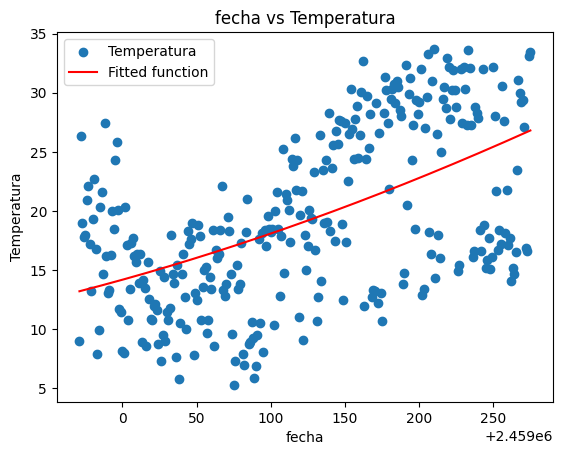

R^2  0.29407174624544796


In [56]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[i-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[i-1]+0.5*(secuenciaS[i]+secuenciaS[i-1])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG

T= Temperaturas_maximas_diarias_ano2
n=len(lista_fechas_julianas_ano2)
J=lista_fechas_julianas_ano2
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
a_44=n
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print("Coeficiente A de la sinusoidal:", rho_3 )


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print("Coeficiente D de la sinusoidal:",a_3, "Coeficiente B de la sinusoidal:", omega_3,"Coeficiente C de la sinusoidal:", phi_3,"Coeficiente A de la sinusoidal:", rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*math.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

In [57]:
print("Coeficientes finales: a", a_3, "Rho", rho_3, "Omega:", omega_3, "Phi:", phi_3)
ListaA.append(a_3)
ListaRho.append(rho_3)
ListaOmega.append(omega_3)
ListaPhi.append(phi_3)

Coeficientes finales: a 92.5612889251193 Rho 85.33302859452498 Omega: 0.0010336163657244987 Phi: 1.8634336000980876


## Modelo FFT

6.59169360960764 0.0031306691748057376 2282.6325758847515 18.98775878156326
R^2: 0.42262675274962436


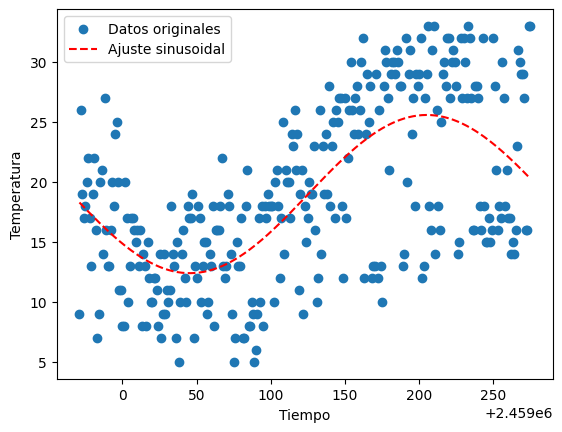

el valor de a_3 es  18.98775878156326
el valor de omega_3 es  0.0031306691748057376
el valor de rho_3 es  6.59169360960764
el valor de phi_3 es  2282.6325758847515


In [58]:

t_data=np.array(lista_fechas_julianas_ano2).astype(int)
y_data=np.array(Temperaturas_maximas_diarias_ano2).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

print("el valor de a_3 es ", D_ajustado)
ListaFFTa_3.append(D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
ListaFFTomega_3.append(f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
ListaFFTrho_3.append(A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)
ListaFFTphi_3.append(φ_ajustada)

# Año 3 (2021-2022)

##Temp Maxima


In [59]:
dfKiwisModelo=dfAno3.copy()

In [60]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = dfKiwisModelo["Fecha Hora"][0]
fecha_final = dfKiwisModelo["Fecha Hora"][len(dfKiwisModelo)-61*24]

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas_ano3 = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas_ano3)

Lista de fechas julianas entre 2021-05-01 00:00:00 y 2022-03-01 00:00:00 :
[2459336, 2459337, 2459338, 2459339, 2459340, 2459341, 2459342, 2459343, 2459344, 2459345, 2459346, 2459347, 2459348, 2459349, 2459350, 2459351, 2459352, 2459353, 2459354, 2459355, 2459356, 2459357, 2459358, 2459359, 2459360, 2459361, 2459362, 2459363, 2459364, 2459365, 2459366, 2459367, 2459368, 2459369, 2459370, 2459371, 2459372, 2459373, 2459374, 2459375, 2459376, 2459377, 2459378, 2459379, 2459380, 2459381, 2459382, 2459383, 2459384, 2459385, 2459386, 2459387, 2459388, 2459389, 2459390, 2459391, 2459392, 2459393, 2459394, 2459395, 2459396, 2459397, 2459398, 2459399, 2459400, 2459401, 2459402, 2459403, 2459404, 2459405, 2459406, 2459407, 2459408, 2459409, 2459410, 2459411, 2459412, 2459413, 2459414, 2459415, 2459416, 2459417, 2459418, 2459419, 2459420, 2459421, 2459422, 2459423, 2459424, 2459425, 2459426, 2459427, 2459428, 2459429, 2459430, 2459431, 2459432, 2459433, 2459434, 2459435, 2459436, 2459437, 245943

In [61]:
Temperaturas_maximas_diarias_ano3=[]
max=9
for i in range(0,len(dfKiwisModelo)-60*24):
  if i%24!=0:
    if dfKiwisModelo["Temp. Máxima"][i]=="--":
      dfKiwisModelo["Temp. Máxima"][i]=0
    if max<float(dfKiwis["Temp. Máxima"][i]):
      max=float(dfKiwisModelo["Temp. Máxima"][i])
  else:
    Temperaturas_maximas_diarias_ano3.append(max)
    max=0

Coeficiente A de la sinusoidal: 568.5633704421941
Coeficiente D de la sinusoidal: 582.4816737893698 Coeficiente B de la sinusoidal: 0.0008107821750586877 Coeficiente C de la sinusoidal: 2.4930488527412002 Coeficiente A de la sinusoidal: 568.5633704421941


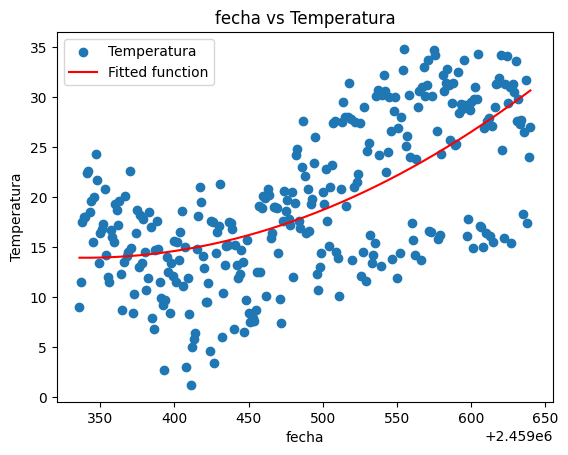

R^2  0.420405856445907


In [62]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[i-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[i-1]+0.5*(secuenciaS[i]+secuenciaS[i-1])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG

T= Temperaturas_maximas_diarias_ano3
n=len(lista_fechas_julianas_ano3)
J=lista_fechas_julianas_ano3
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
a_44=n
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print("Coeficiente A de la sinusoidal:", rho_3 )


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print("Coeficiente D de la sinusoidal:",a_3, "Coeficiente B de la sinusoidal:", omega_3,"Coeficiente C de la sinusoidal:", phi_3,"Coeficiente A de la sinusoidal:", rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*math.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

In [63]:
print("Coeficientes finales: a", a_3, "Rho", rho_3, "Omega:", omega_3, "Phi:", phi_3)
ListaA.append(a_3)
ListaRho.append(rho_3)
ListaOmega.append(omega_3)
ListaPhi.append(phi_3)

Coeficientes finales: a 582.4816737893698 Rho 568.5633704421941 Omega: 0.0008107821750586877 Phi: 2.4930488527412002


## Modelo FFT

7.293293617395092 0.002761057869317405 7999.546152328359 19.367885971288324
R^2: 0.49862596504400336


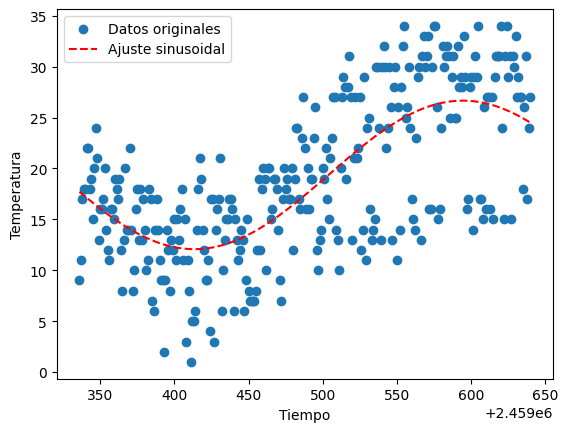

el valor de a_3 es  19.367885971288324
el valor de omega_3 es  0.002761057869317405
el valor de rho_3 es  7.293293617395092
el valor de phi_3 es  7999.546152328359


In [64]:

t_data=np.array(lista_fechas_julianas_ano3).astype(int)
y_data=np.array(Temperaturas_maximas_diarias_ano3).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

print("el valor de a_3 es ", D_ajustado)
ListaFFTa_3.append(D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
ListaFFTomega_3.append(f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
ListaFFTrho_3.append(A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)
ListaFFTphi_3.append(φ_ajustada)

# Año 4 (2022-2023)

##Temp Maxima


In [65]:
dfKiwisModelo=dfAno4.copy()

In [66]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = dfKiwisModelo["Fecha Hora"][0]
fecha_final = dfKiwisModelo["Fecha Hora"][len(dfKiwisModelo)-61*24]

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas_ano4 = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas_ano4)

Lista de fechas julianas entre 2022-05-01 00:00:00 y 2023-03-01 00:00:00 :
[2459701, 2459702, 2459703, 2459704, 2459705, 2459706, 2459707, 2459708, 2459709, 2459710, 2459711, 2459712, 2459713, 2459714, 2459715, 2459716, 2459717, 2459718, 2459719, 2459720, 2459721, 2459722, 2459723, 2459724, 2459725, 2459726, 2459727, 2459728, 2459729, 2459730, 2459731, 2459732, 2459733, 2459734, 2459735, 2459736, 2459737, 2459738, 2459739, 2459740, 2459741, 2459742, 2459743, 2459744, 2459745, 2459746, 2459747, 2459748, 2459749, 2459750, 2459751, 2459752, 2459753, 2459754, 2459755, 2459756, 2459757, 2459758, 2459759, 2459760, 2459761, 2459762, 2459763, 2459764, 2459765, 2459766, 2459767, 2459768, 2459769, 2459770, 2459771, 2459772, 2459773, 2459774, 2459775, 2459776, 2459777, 2459778, 2459779, 2459780, 2459781, 2459782, 2459783, 2459784, 2459785, 2459786, 2459787, 2459788, 2459789, 2459790, 2459791, 2459792, 2459793, 2459794, 2459795, 2459796, 2459797, 2459798, 2459799, 2459800, 2459801, 2459802, 245980

In [67]:
Temperaturas_maximas_diarias_ano4=[]
max=9
for i in range(0,len(dfKiwisModelo)-60*24):
  if i%24!=0:
    if dfKiwisModelo["Temp. Máxima"][i]=="--":
      dfKiwisModelo["Temp. Máxima"][i]=0
    if max<float(dfKiwis["Temp. Máxima"][i]):
      max=float(dfKiwisModelo["Temp. Máxima"][i])
  else:
    Temperaturas_maximas_diarias_ano4.append(max)
    max=0

<ipython-input-67-b3f9cd7e3cf8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo["Temp. Máxima"][i]=0
<ipython-input-67-b3f9cd7e3cf8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo["Temp. Máxima"][i]=0
<ipython-input-67-b3f9cd7e3cf8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo["Temp. Máxima"][i]=0
<ipython-input-67-b3f9cd7e3cf8>:6: SettingWithCopyWarning: 
A value is trying to be set on 

Coeficiente A de la sinusoidal: 1203.271054039499
Coeficiente D de la sinusoidal: 1214.727862358182 Coeficiente B de la sinusoidal: 0.0006439934099481216 Coeficiente C de la sinusoidal: 4.045356241683405 Coeficiente A de la sinusoidal: 1203.271054039499


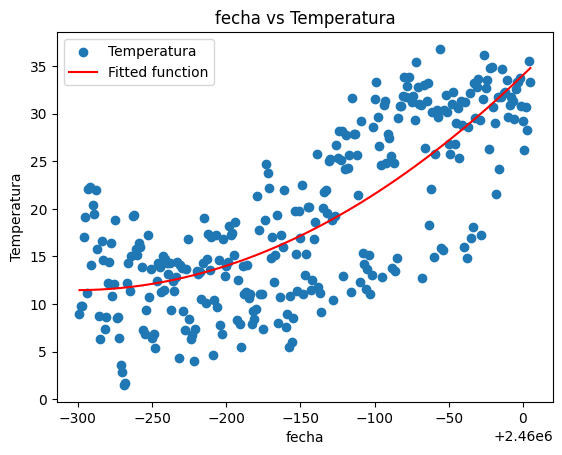

R^2  0.5991322205011912


In [68]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[i-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[i-1]+0.5*(secuenciaS[i]+secuenciaS[i-1])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG

T= Temperaturas_maximas_diarias_ano4
n=len(lista_fechas_julianas_ano4)
J=lista_fechas_julianas_ano4
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
a_44=n
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print("Coeficiente A de la sinusoidal:", rho_3 )


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print("Coeficiente D de la sinusoidal:",a_3, "Coeficiente B de la sinusoidal:", omega_3,"Coeficiente C de la sinusoidal:", phi_3,"Coeficiente A de la sinusoidal:", rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*math.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

In [69]:
print("Coeficientes finales: a", a_3, "Rho", rho_3, "Omega:", omega_3, "Phi:", phi_3)
ListaA.append(a_3)
ListaRho.append(rho_3)
ListaOmega.append(omega_3)
ListaPhi.append(phi_3)

Coeficientes finales: a 1214.727862358182 Rho 1203.271054039499 Omega: 0.0006439934099481216 Phi: 4.045356241683405


## Modelo FFT

9.622401982500206 0.0021735177082236614 17080.236742854497 20.38840527977998
R^2: 0.627337881468016


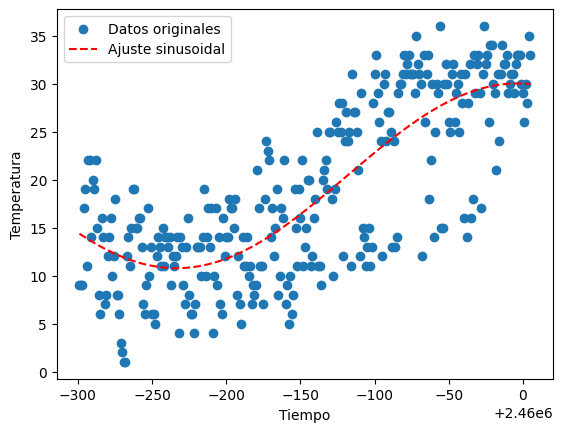

el valor de a_3 es  20.38840527977998
el valor de omega_3 es  0.0021735177082236614
el valor de rho_3 es  9.622401982500206
el valor de phi_3 es  17080.236742854497


In [70]:

t_data=np.array(lista_fechas_julianas_ano4).astype(int)
y_data=np.array(Temperaturas_maximas_diarias_ano4).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

print("el valor de a_3 es ", D_ajustado)
ListaFFTa_3.append(D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
ListaFFTomega_3.append(f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
ListaFFTrho_3.append(A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)
ListaFFTphi_3.append(φ_ajustada)

# Año 5 (2023-2024)

##Temp Maxima


In [71]:
dfKiwisModelo=dfAno5.copy()

In [72]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = dfKiwisModelo["Fecha Hora"][0]
fecha_final = dfKiwisModelo["Fecha Hora"][len(dfKiwisModelo)-60*24]

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas_ano5 = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas_ano5)

Lista de fechas julianas entre 2023-05-01 00:00:00 y 2024-02-12 01:00:00 :
[2460066, 2460067, 2460068, 2460069, 2460070, 2460071, 2460072, 2460073, 2460074, 2460075, 2460076, 2460077, 2460078, 2460079, 2460080, 2460081, 2460082, 2460083, 2460084, 2460085, 2460086, 2460087, 2460088, 2460089, 2460090, 2460091, 2460092, 2460093, 2460094, 2460095, 2460096, 2460097, 2460098, 2460099, 2460100, 2460101, 2460102, 2460103, 2460104, 2460105, 2460106, 2460107, 2460108, 2460109, 2460110, 2460111, 2460112, 2460113, 2460114, 2460115, 2460116, 2460117, 2460118, 2460119, 2460120, 2460121, 2460122, 2460123, 2460124, 2460125, 2460126, 2460127, 2460128, 2460129, 2460130, 2460131, 2460132, 2460133, 2460134, 2460135, 2460136, 2460137, 2460138, 2460139, 2460140, 2460141, 2460142, 2460143, 2460144, 2460145, 2460146, 2460147, 2460148, 2460149, 2460150, 2460151, 2460152, 2460153, 2460154, 2460155, 2460156, 2460157, 2460158, 2460159, 2460160, 2460161, 2460162, 2460163, 2460164, 2460165, 2460166, 2460167, 246016

In [73]:
Temperaturas_maximas_diarias_ano5=[]
max=9
for i in range(0,len(dfKiwisModelo)-60*24):
  if i%24!=0:
    if dfKiwisModelo["Temp. Máxima"][i]=="--":
      dfKiwisModelo["Temp. Máxima"][i]=0
    if max<float(dfKiwis["Temp. Máxima"][i]):
      max=float(dfKiwisModelo["Temp. Máxima"][i])
  else:
    Temperaturas_maximas_diarias_ano5.append(max)
    max=0

<ipython-input-73-b47c29ee3d71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo["Temp. Máxima"][i]=0
<ipython-input-73-b47c29ee3d71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo["Temp. Máxima"][i]=0
<ipython-input-73-b47c29ee3d71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfKiwisModelo["Temp. Máxima"][i]=0
<ipython-input-73-b47c29ee3d71>:6: SettingWithCopyWarning: 
A value is trying to be set on 

In [74]:
len(Temperaturas_maximas_diarias_ano5)

288

In [75]:
len(lista_fechas_julianas_ano5)

288

Coeficiente A de la sinusoidal: 57954.60282453964
Coeficiente D de la sinusoidal: 57967.50764129148 Coeficiente B de la sinusoidal: 0.00012297140894674508 Coeficiente C de la sinusoidal: 3.7769033082935533 Coeficiente A de la sinusoidal: 57954.60282453964


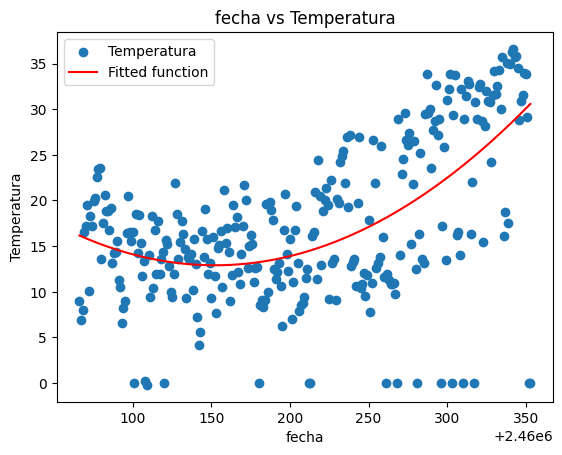

R^2  0.3250144478581968


In [76]:
def secuencia(n,T,J):
   secuenciaS=[0]
   secuenciaG=[0]
   for i in range(1,n):
      secuenciaS.append(secuenciaS[i-1]+0.5*(T[i]+T[i-1])*(J[i]-J[i-1])) #vamos a omitir los dias julianos por que en nuestro caso la diferencia es 1
      secuenciaG.append(secuenciaG[i-1]+0.5*(secuenciaS[i]+secuenciaS[i-1])*(J[i]-J[i-1]))
   return secuenciaS,secuenciaG

T= Temperaturas_maximas_diarias_ano5
n=len(lista_fechas_julianas_ano5)
J=lista_fechas_julianas_ano5
secuenciaS,secuenciaG=secuencia(n,T,J)
a_11=0
a_12=0
a_13=0
a_14=0
a_21=0
a_22=0
a_23=0
a_24=0
a_31=0
a_32=0
a_33=0
a_34=0
a_41=0
a_42=0
a_43=0
a_44=n
b_11=0
b_21=0
b_31=0
b_41=0

for i in range(n):
  a_11+=secuenciaG[i]**2
  a_12+=(secuenciaG[i]*J[i])**2
  a_13+=secuenciaG[i]*J[i]
  a_14+=secuenciaG[i]
  a_21+=(secuenciaG[i]*J[i])**2
  a_22+=J[i]**4
  a_23+=J[i]**3
  a_24+=J[i]**2
  a_31+=secuenciaG[i]*J[i]
  a_32+=J[i]**3
  a_33+=J[i]**2
  a_34+=J[i]
  a_41+=secuenciaG[i]
  a_42+=J[i]**2
  a_43+=J[i]
  b_11+=T[i]*secuenciaG[i]
  b_21+=(T[i]*J[i])**2
  b_31+=T[i]*J[i]
  b_41+=T[i]
fila1= [a_11,a_12,a_13,a_14]
fila2=[a_21,a_22,a_23,a_24]
fila3=[a_31,a_32,a_33,a_34]
fila4=[a_41,a_42,a_43,a_44]
b=np.array([b_11,b_21,b_31,b_41])

matriz=np.array([fila1,fila2,fila3,fila4])
matriz = matriz.astype(np.float64)
matriz2= np.linalg.inv(matriz)
x=matriz2.dot(b)
A_1=x[0]
B_1=x[1]
C_1=x[2]
D_1=x[3]
w_1= (A_1)**(1/2)
a_1= (2*B_1)/w_1**2
b_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.sin(w_1*J[0])+(C_1+2*B_1*J[0])*math.cos(w_1*J[0])
c_1=(B_1*J[0]**2+C_1*J[0]+D_1-a_1)*math.cos(w_1*J[0])+(C_1+2*B_1*J[0])*math.sin(w_1*J[0])
rho_1=(b_1**2+c_1**2)**(1/2)
if b_1>0:
  phi_1= math.atan(c_1/b_1)
if b_1<0:
  phi_1= math.pi+math.atan(c_1/b_1)
if b_1==0 and c_1>0:
  phi_1= math.pi/2
if b_1==0 and c_1<0:
  phi_1= -math.pi/2



a_2=a_1
rho_2=rho_1
#---------------------------------------------------------------------------------------
#Parte 2




def secuencia2(n,J,T):
   secuenciaK=[]
   secuenciathetha=[]
   for i in range(n):
      secuenciaK.append(int((w_1*J[i]+phi_1)/math.pi))
      if rho_2**2>(T[i]-a_2)**2:
         secuenciathetha.append(math.pi*secuenciaK[i]+(-1)**(secuenciaK[i])*math.atan((T[i]-a_2)/(rho_2**2-(T[i]-a_2)**2)**(0.5)))
      if rho_2**2<(T[i]-a_2)**2 and T[i]>a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]+0.5*math.pi*(-1)**(secuenciaK[i]))
      if rho_2**2<(T[i]-a_2)**2 and T[i]<a_2:
         secuenciathetha.append(math.pi*secuenciaK[i]-0.5*math.pi*(-1)**(secuenciaK[i]))
   return secuenciaK, secuenciathetha
secuenciaK, secuenciathetha=secuencia2(n,J,T)

sum_j=0
sum_j_square=0
sum_theta_j=0
sum_theta=0
for i in range(n):
  sum_j_square+=J[i]**2
  sum_j+=J[i]
  sum_theta_j+=secuenciathetha[i]*J[i]
  sum_theta+=secuenciathetha[i]


fila1=[sum_j_square, sum_j]
fila2=[sum_j, n]
matriz2=np.array([fila1, fila2])
matrizfila=np.array([sum_theta_j, sum_theta])

valores_parte2=np.linalg.inv(matriz2).dot(matrizfila)

b_2=rho_2*math.cos(valores_parte2[1])
c_2=rho_2*math.sin(valores_parte2[1])
#-----------------------------------------------------------------------------------------------------
# Parte 3





omega_3=valores_parte2[0]

sum_alphas=0
sum_betas=0
sum_alphas_square=0
sum_betas_square=0
sum_alpha_betas=0
sum_Temp=0
sum_Temp_alpha=0
sum_Temp_beta=0
for i in range(n):
  sum_alphas+=math.sin(omega_3*J[i])
  sum_betas+=math.cos(omega_3*J[i])
  sum_alphas_square+=math.sin(omega_3*J[i])**2
  sum_betas_square+=math.cos(omega_3*J[i])**2
  sum_alpha_betas+=math.sin(omega_3*J[i])*math.cos(omega_3*J[i])
  sum_Temp+=T[i]
  sum_Temp_alpha+=T[i]*math.sin(omega_3*J[i])
  sum_Temp_beta+=T[i]*math.cos(omega_3*J[i])


fila1=[n,sum_alphas,sum_betas]
fila2=[sum_alphas,sum_alphas_square, sum_alpha_betas ]
fila3=[sum_betas,sum_alpha_betas, sum_betas_square ]

matriz3=np.array([fila1, fila2, fila3])
matrizcolumna=np.array([sum_Temp, sum_Temp_alpha, sum_Temp_beta])

valores_finales=np.linalg.inv(matriz3).dot(matrizcolumna)


a_3=valores_finales[0]
b_3=valores_finales[1]
c_3=valores_finales[2]




rho_3=math.sqrt(b_3**2+c_3**2)
print("Coeficiente A de la sinusoidal:", rho_3 )


if b_3>0:
  phi_3= math.atan(c_3/b_3)
if b_3<0:
  phi_3= math.pi+math.atan(c_3/b_3)
if b_3==0 and c_3>0:
  phi_3= math.pi/2
if b_3==0 and c_3<0:
  phi_3= -math.pi/2


print("Coeficiente D de la sinusoidal:",a_3, "Coeficiente B de la sinusoidal:", omega_3,"Coeficiente C de la sinusoidal:", phi_3,"Coeficiente A de la sinusoidal:", rho_3)
sinusoidal=[]
for j in J:
  sinusoidal.append(a_3+rho_3*math.sin(omega_3*j+phi_3))


  import matplotlib.pyplot as plt
#r_cuadrado = calcular_r_cuadrado(np.array(T), sinusoidal)
#print("R^2 ",r_cuadrado)
plt.scatter(J,T,label='Temperatura')
plt.plot(J, sinusoidal, 'r-',label='Fitted function')
plt.title("fecha vs Temperatura")
plt.xlabel('fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

from sklearn.metrics import r2_score
# Coeficiente de determinación R^2
r_squared = r2_score(np.array(T), sinusoidal)

print("R^2 ",r_squared)

In [77]:
print("Coeficientes finales: a", a_3, "Rho", rho_3, "Omega:", omega_3, "Phi:", phi_3)
ListaA.append(a_3)
ListaRho.append(rho_3)
ListaOmega.append(omega_3)
ListaPhi.append(phi_3)

Coeficientes finales: a 57967.50764129148 Rho 57954.60282453964 Omega: 0.00012297140894674508 Phi: 3.7769033082935533


## Modelo FFT

-19.87058350173045 0.0011466869811732065 35947.5083450698 32.127398821787274
R^2: 0.33105882062443004


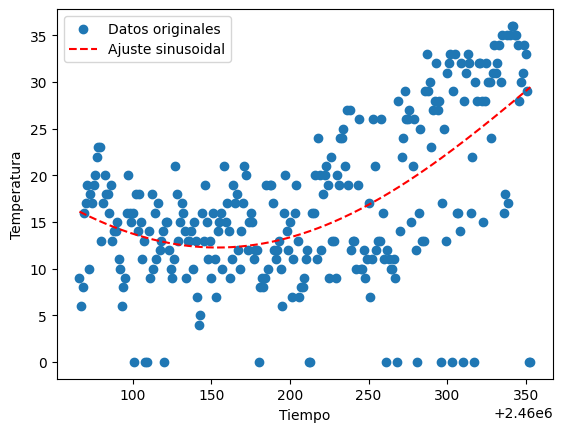

el valor de a_3 es  32.127398821787274
el valor de omega_3 es  0.0011466869811732065
el valor de rho_3 es  -19.87058350173045
el valor de phi_3 es  35947.5083450698


In [78]:
t_data=np.array(lista_fechas_julianas_ano5).astype(int)
y_data=np.array(Temperaturas_maximas_diarias_ano5).astype(int)
A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)
from scipy.fft import fft, fftfreq

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]

idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])
φ_inicial = 0
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


A_inicial = (np.max(y_data) - np.min(y_data)) / 2
D_inicial = np.mean(y_data)

N = len(t_data)
T = t_data[1] - t_data[0]
yf = fft(y_data - D_inicial)
xf = fftfreq(N, T)[:N//2]
idx = np.argmax(np.abs(yf[:N//2]))
f_inicial = np.abs(xf[idx])

φ_inicial = 0


def sinusoidal(t, A, f, φ, D):
    return A * np.sin(2 * np.pi * f * t + φ) + D


popt, pcov = curve_fit(sinusoidal, t_data, y_data, p0=[A_inicial, f_inicial, φ_inicial, D_inicial], maxfev=100000000 )


A_ajustada, f_ajustada, φ_ajustada, D_ajustado = popt
print(A_ajustada, f_ajustada, φ_ajustada, D_ajustado)

y_fit = sinusoidal(t_data, *popt)


residuos = y_data - y_fit
SS_res = np.sum(residuos**2)
SS_tot = np.sum((y_data - np.mean(y_data))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R^2: {R2}")

plt.figure()
plt.scatter(t_data, y_data, label='Datos originales')
plt.plot(t_data, y_fit, 'r--', label='Ajuste sinusoidal')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

print("el valor de a_3 es ", D_ajustado)
ListaFFTa_3.append(D_ajustado)
print("el valor de omega_3 es ",f_ajustada)
ListaFFTomega_3.append(f_ajustada)
print("el valor de rho_3 es ",A_ajustada)
ListaFFTrho_3.append(A_ajustada)
print("el valor de phi_3 es ",φ_ajustada)
ListaFFTphi_3.append(φ_ajustada)

#Analisis

In [79]:
ListaA

[3201.1891497738557,
 57967.50764129148,
 92.5612889251193,
 582.4816737893698,
 1214.727862358182,
 57967.50764129148]

In [80]:
ListaRho

[3188.458966261637,
 57954.60282453964,
 85.33302859452498,
 568.5633704421941,
 1203.271054039499,
 57954.60282453964]

In [81]:
ListaOmega

[0.0002946315811933557,
 0.00012297140894674508,
 0.0010336163657244987,
 0.0008107821750586877,
 0.0006439934099481216,
 0.00012297140894674508]

In [82]:
ListaPhi

[2.9287479419718463,
 3.7769033082935533,
 1.8634336000980876,
 2.4930488527412002,
 4.045356241683405,
 3.7769033082935533]

In [83]:
import datetime
def fecha_juliana(fecha):
    a = (14 - fecha.month) // 12
    y = fecha.year + 4800 - a
    m = fecha.month + 12 * a - 3
    return fecha.day + ((153 * m + 2) // 5) + 365 * y + (y // 4) - (y // 100) + (y // 400) - 32045

def generar_lista_fechas_julianas(fecha_inicial, fecha_final):
    lista_fechas = []
    delta = datetime.timedelta(days=1)  # Diferencia de un día

    fecha_actual = fecha_inicial
    while fecha_actual <= fecha_final:
        lista_fechas.append(fecha_juliana(fecha_actual))
        fecha_actual += delta

    return lista_fechas
# Definir las fechas inicial y final
fecha_inicial = dfKiwis["Fecha Hora"][0]
fecha_final = dfKiwis["Fecha Hora"][len(dfKiwis)-1]

# Generar la lista de fechas julianas entre las fechas dadas
lista_fechas_julianas = generar_lista_fechas_julianas(fecha_inicial, fecha_final)
print("Lista de fechas julianas entre", fecha_inicial, "y", fecha_final, ":")
print(lista_fechas_julianas)

Lista de fechas julianas entre 2019-05-01 00:00:00 y 2024-04-12 00:00:00 :
[2458605, 2458606, 2458607, 2458608, 2458609, 2458610, 2458611, 2458612, 2458613, 2458614, 2458615, 2458616, 2458617, 2458618, 2458619, 2458620, 2458621, 2458622, 2458623, 2458624, 2458625, 2458626, 2458627, 2458628, 2458629, 2458630, 2458631, 2458632, 2458633, 2458634, 2458635, 2458636, 2458637, 2458638, 2458639, 2458640, 2458641, 2458642, 2458643, 2458644, 2458645, 2458646, 2458647, 2458648, 2458649, 2458650, 2458651, 2458652, 2458653, 2458654, 2458655, 2458656, 2458657, 2458658, 2458659, 2458660, 2458661, 2458662, 2458663, 2458664, 2458665, 2458666, 2458667, 2458668, 2458669, 2458670, 2458671, 2458672, 2458673, 2458674, 2458675, 2458676, 2458677, 2458678, 2458679, 2458680, 2458681, 2458682, 2458683, 2458684, 2458685, 2458686, 2458687, 2458688, 2458689, 2458690, 2458691, 2458692, 2458693, 2458694, 2458695, 2458696, 2458697, 2458698, 2458699, 2458700, 2458701, 2458702, 2458703, 2458704, 2458705, 2458706, 245870

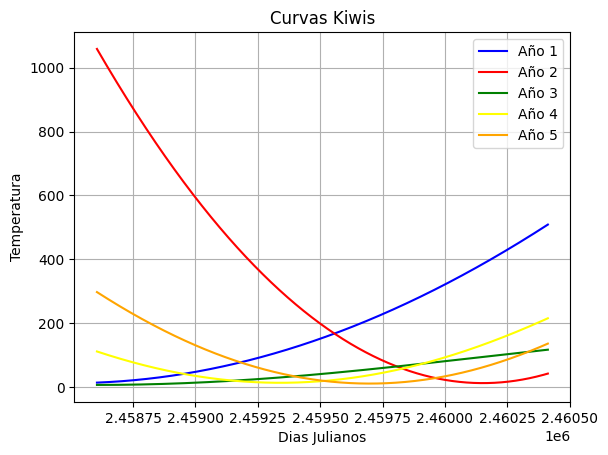

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para las curvas
x = np.array(lista_fechas_julianas).astype(float)
y1 = ListaA[0]+ListaRho[0]*np.sin(ListaOmega[0]*x+ListaPhi[0])
y2 = ListaA[1]+ListaRho[1]*np.sin(ListaOmega[1]*x+ListaPhi[1])
y3 = ListaA[2]+ListaRho[2]*np.sin(ListaOmega[2]*x+ListaPhi[2])
y4 = ListaA[3]+ListaRho[3]*np.sin(ListaOmega[3]*x+ListaPhi[3])
y5 = ListaA[4]+ListaRho[4]*np.sin(ListaOmega[4]*x+ListaPhi[4])

# Crear el gráfico y trazar las curvas
plt.plot(x, y1, label='Año 1', color='blue')
plt.plot(x, y2, label='Año 2', color='red')
plt.plot(x, y3, label='Año 3', color='green')
plt.plot(x, y4, label='Año 4', color='yellow')
plt.plot(x, y5, label='Año 5', color='orange')

# Agregar título y etiquetas
plt.title('Curvas Kiwis')
plt.xlabel('Dias Julianos')
plt.ylabel('Temperatura')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

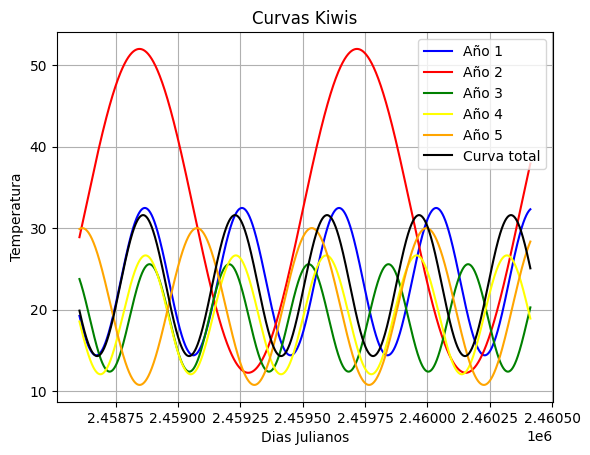

In [85]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array(lista_fechas_julianas).astype(float)
ycompleto = ListaFFTa_3[0]+ListaFFTrho_3[0]*np.sin(2*np.pi*ListaFFTomega_3[0]*x+ListaFFTphi_3[0])
y1 = ListaFFTa_3[1]+ListaFFTrho_3[1]*np.sin(2*np.pi*ListaFFTomega_3[1]*x+ListaFFTphi_3[1])
y2 = ListaFFTa_3[2]+ListaFFTrho_3[2]*np.sin(2*np.pi*ListaFFTomega_3[2]*x+ListaFFTphi_3[2])
y3 = ListaFFTa_3[3]+ListaFFTrho_3[3]*np.sin(2*np.pi*ListaFFTomega_3[3]*x+ListaFFTphi_3[3])
y4 = ListaFFTa_3[4]+ListaFFTrho_3[4]*np.sin(2*np.pi*ListaFFTomega_3[4]*x+ListaFFTphi_3[4])
y5=ListaFFTa_3[5]+ListaFFTrho_3[5]*np.sin(2*np.pi*ListaFFTomega_3[5]*x+ListaFFTphi_3[5])

# Crear el gráfico y trazar las curvas
plt.plot(x, y1, label='Año 1', color='blue')
plt.plot(x, y2, label='Año 2', color='red')
plt.plot(x, y3, label='Año 3', color='green')
plt.plot(x, y4, label='Año 4', color='yellow')
plt.plot(x, y5, label='Año 5', color='orange')
plt.plot(x, ycompleto, label='Curva total', color='black')


# Agregar título y etiquetas
plt.title('Curvas Kiwis')
plt.xlabel('Dias Julianos')
plt.ylabel('Temperatura')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()